Importing Libraries 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
plt.style.use('ggplot')
import warnings 
warnings.filterwarnings('ignore')

Importing Data

In [3]:
data=pd.read_csv('data/tested.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exploratory Data Analysis

In [4]:
data=data.drop(columns='PassengerId')

In [5]:
data.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [6]:
data.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

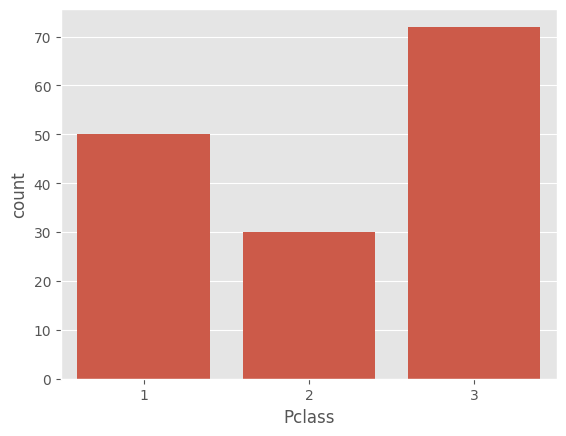

In [7]:
sns.countplot(data[data['Survived']==1],x='Pclass')

<Axes: xlabel='Embarked', ylabel='Count'>

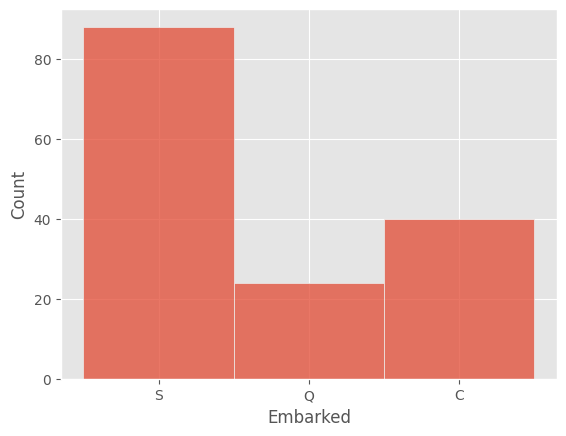

In [8]:
sns.histplot(data[data['Survived']==1],x='Embarked')

In [71]:
#data['First_Name4']=data['First_Name'].apply(lambda x : 1 if Name_counts[x]==4 else 0 )

In [72]:
#plt.hist(data.First_Name4,color='green')

In [73]:
#data=data.drop(columns='First_Name')

In [74]:
#data.groupby('First_Name4').Survived.mean()

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [9]:
data=data.drop(columns='Name')

In [11]:
data=data.drop(columns='Cabin')

In [12]:
data.Age.mean()

30.272590361445783

In [13]:
data['Age']=data.Age.fillna(data.Age.mean())

In [14]:
data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [15]:
data[data['Fare']>100].shape

(31, 9)

In [16]:
data['Fare']=data['Fare'].apply(lambda x : 100 if x >100 else x)

In [17]:
data['Fare']=data.Fare.fillna(data.Fare.mean())

In [18]:
data.groupby('Survived').Fare.mean()

Survived
0    23.522320
1    35.342928
Name: Fare, dtype: float64

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
data.Parch.value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [21]:
data[data['Parch']!=0].Survived.mean()

0.5638297872340425

In [22]:
data['Parch']=data['Parch'].apply(lambda x : 0 if x ==0 else 1)

In [23]:
data.groupby('Parch').Survived.mean()

Parch
0    0.305556
1    0.563830
Name: Survived, dtype: float64

In [24]:
data.SibSp.value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [25]:
data=data.drop(columns='Ticket')

In [26]:
Y=data['Survived']
X=data.drop(columns='Survived')

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le_sex = LabelEncoder()
X['Sex'] = le_sex.fit_transform(X['Sex'])

le_embarked = LabelEncoder()
X['Embarked'] = le_embarked.fit_transform(X['Embarked'])

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

Splitting the Data into Train and Test Sets

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=45)

Model Building

In [31]:
model1 = RandomForestClassifier()
model1.fit(X_train, Y_train)

y_pred1=model1.predict(X_test)
accuracy_score(Y_test,y_pred1)

# Display the classification report
report = classification_report(Y_test, y_pred1)
print(f'The Classification report is :\n{report}')

The Classification report is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        51

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [34]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)

y_pred2=model2.predict(X_test)

accuracy_score(Y_test,y_pred2)

# Display the classification report
report = classification_report(Y_test, y_pred2)
print(f'The Classification report is :\n{report}')

The Classification report is :
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       103
           1       0.97      0.98      0.98        65

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



In [35]:
model3=SVC()
model3.fit(X_train,Y_train)

y_pred3=model3.predict(X_test)

accuracy_score(Y_test,y_pred3)

# Display the classification report
report = classification_report(Y_test, y_pred3)
print(f'The Classification report is :\n{report}')

The Classification report is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        65

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168



In [69]:
import joblib


joblib.dump(model1, 'model_rf.pkl')
joblib.dump(model2, 'model_knn.pkl')
joblib.dump(model3, 'model_scv.pkl')

['model_scv.pkl']